In [1]:
import os          
import cv2                                 
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report        
import matplotlib.pyplot as plt 
import sklearn.model_selection as model_selection

2022-12-16 14:06:56.255900: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-16 14:06:56.549985: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-16 14:06:56.550177: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-16 14:06:57.578753: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerr

In [2]:
def load_data(dataset):
    class_names = []
    images = []
    labels = []  
    for folder in os.listdir(dataset):
        class_names.append(folder)    
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 
    print("Loading Dataset {}".format(dataset))
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (150, 150)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(label)
    return images, labels , class_names

In [3]:
dataset = '/home/ragu/DATASETS/TEMP/'
images, labels, class_names = load_data(dataset)

Loading Dataset /home/ragu/DATASETS/TEMP/


100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 38.03it/s]


In [4]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 

In [5]:
images = images/255.0

In [6]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

2022-12-16 14:06:59.603112: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-16 14:06:59.603634: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-16 14:06:59.603779: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-16 14:06:59.603853: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not lo

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, batch_size=128, epochs = 50, validation_split = 0.2)

Epoch 1/50


2022-12-16 14:07:00.992473: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 123363328 exceeds 10% of free system memory.


1/1 [==============================] - ETA: 0s - loss: 3.3899 - accuracy: 0.0000e+00

2022-12-16 14:07:01.386343: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 123363328 exceeds 10% of free system memory.


1/1 [==============================] - 2s 2s/step - loss: 3.3899 - accuracy: 0.0000e+00 - val_loss: 2.7507 - val_accuracy: 0.3333
Epoch 2/50


2022-12-16 14:07:01.837794: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 123363328 exceeds 10% of free system memory.


1/1 [==============================] - ETA: 0s - loss: 2.6498 - accuracy: 0.3182

2022-12-16 14:07:02.222495: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 123363328 exceeds 10% of free system memory.


1/1 [==============================] - 1s 623ms/step - loss: 2.6498 - accuracy: 0.3182 - val_loss: 2.0931 - val_accuracy: 0.3333
Epoch 3/50


2022-12-16 14:07:02.464084: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 123363328 exceeds 10% of free system memory.


1/1 [==============================] - 1s 694ms/step - loss: 1.8200 - accuracy: 0.3636 - val_loss: 1.9714 - val_accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 1s 597ms/step - loss: 1.5538 - accuracy: 0.3182 - val_loss: 1.3491 - val_accuracy: 0.6667
Epoch 5/50
1/1 [==============================] - 1s 540ms/step - loss: 1.1468 - accuracy: 0.7727 - val_loss: 1.5927 - val_accuracy: 0.3333
Epoch 6/50
1/1 [==============================] - 1s 513ms/step - loss: 1.7229 - accuracy: 0.1818 - val_loss: 1.4923 - val_accuracy: 0.1667
Epoch 7/50
1/1 [==============================] - 1s 510ms/step - loss: 1.1317 - accuracy: 0.4091 - val_loss: 1.6717 - val_accuracy: 0.6667
Epoch 8/50
1/1 [==============================] - 0s 494ms/step - loss: 1.0931 - accuracy: 0.8182 - val_loss: 1.9435 - val_accuracy: 0.3333
Epoch 9/50
1/1 [==============================] - 1s 503ms/step - loss: 1.2974 - accuracy: 0.3182 - val_loss: 1.6118 - val_accuracy: 0.5000
Epoch 10/50
1/1 [==============

In [10]:
model.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 48ms/step - loss: 0.1808 - accuracy: 0.8750


[0.18079018592834473, 0.875]

In [11]:
def plot_accuracy_loss(history):
    y = ['accuracy','loss']
    for x in y:
        plt.plot(history.history[x],'bo--', label = x )
        plt.plot(history.history['val_'+x], 'ro--', label ='val_'+x)
        plt.title("train_"+x + " vs val_"+x)
        plt.ylabel(x)
        plt.xlabel("epochs")
        plt.legend()
        plt.legend()
        plt.show()

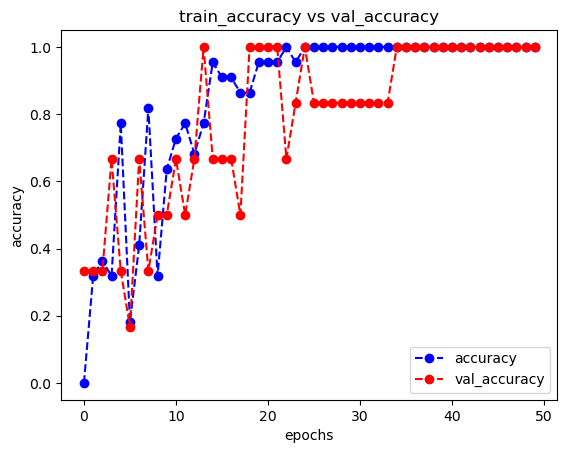

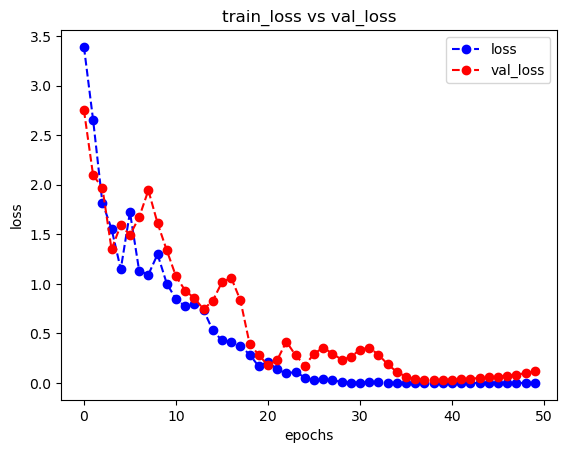

In [12]:
plot_accuracy_loss(history)

In [15]:
def measures(y_actual, y_pred):
    TP = []
    FP = []
    TN = []
    FN = []
    Accuracy = []
    Error_rate = []
    Precision = []
    Recall = []
    F_measure = []
    for i in range(len(class_names)):
        
        tp = 0
        fp = 0
        tn = 0
        fn = 0

        for i in range(len(y_pred)): 
            if y_actual[i]==y_pred[i]==1:
                tp += 1
            if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
                fp += 1
            if y_actual[i]==y_pred[i]==0:
                tn += 1
            if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
                fn += 1
                
        TP.append(tp)
        FP.append(fp)
        TN.append(tn)
        FN.append(fn)
            
        accuracy = (tp + tn) / (tp + fp + fn + tn)
        error_rate = (fp + fn) / (tp + fp + fn + tn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn + 1)
        f_measure = (2 * recall * precision) / (recall + precision+)
        
        Accuracy.append(accuracy)
        Error_rate.append(error_rate)
        Precision.append(precision)
        Recall.append(recall)
        F_measure.append(f_measure)
        
    measures = pd.DataFrame()
    measures['class_name'] = class_names
    measures['TP'] = TP
    measures['FP'] = FP
    measures['TN'] = TN
    measures['FN'] = FN
    measures['Accuracy'] = Accuracy
    measures['Error_rate'] = Error_rate
    measures['Precision'] = Precision
    measures['Recall'] = Recall
    measures['F_measure'] = F_measure
    print(measures)
    
    confusion_matrix_df = pd.DataFrame(confusion_matrix(actual,predictions),index = class_names, columns =class_names)
    plt.figure(figsize=(15,15))
    sns.heatmap(confusion_matrix_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [16]:
predictions = np.argmax(model.predict(test_images), axis = 1)
actual = test_labels
measures(actual, predictions)

1/1 [==============================] - 0s 69ms/step


ZeroDivisionError: float division by zero